## Feature ranking with elimination

In [3]:
import csv
import time
from pathlib import Path
from pprint import pprint
import csv
import multiprocessing
import statistics 
import pickle

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

import pandas as pd
import numpy as np

from xgboost import XGBRegressor
import xgboost as xgb

from matplotlib import pyplot as plt
import utilities as utl 

In [4]:
input_files = [
    Path("../data/formated_dataset.csv"),
    Path("../data/scaler_df.csv"),
    Path("../data/quantile_df.csv"),
    Path("../data/max_abs_df.csv")    
]     

input_file = input_files[0]


## Recursive feature elimination with cross-validation


In [5]:
# choose an input data file
input_file = input_files[0]

input_file = input_files[2]
df = pd.read_csv(input_file).astype('float32')
print(df.shape)

y = df['target']
X = df.drop("target",axis=1)

results = utl.feature_ranking_elimination(X,y)

output_file_name = str(input_file.stem)+"_rmse.pkl"
file = open(output_file_name, 'wb')
pickle.dump(results, file)
file.close()

(489317, 48)
(489317, 48)


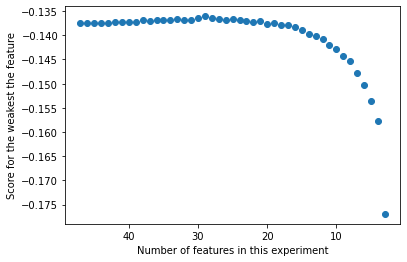

In [4]:
from matplotlib import pyplot as plt
plot_1_data = []
for exp_no in results.keys():
        plot_1_data.append((exp_no,results[exp_no]["lowest_score"]))

plt.scatter(*zip(*plot_1_data))
plt.gca().invert_xaxis()
# plt.ylim(0,0.5)
plt.xlabel("Number of features in this experiment")
plt.ylabel("Score for the weakest the feature")
plt.show()

In [10]:
output = ""
for k in results:
    output =  results[k]["lowest_feature"] + "\n" + output
print(output)

dem_fill
Potassium_2016
be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata
3dem_mag1_fin
LOC_distance_to_coast
ceno_euc_aust1
Grav_lane_clip
3dem_mag2
LATITUDE_GRID1_clip
clim_WDA_albers
si_geol1
mrvbf_9
relief_elev_focalrange1000m_3s
Rad2016K_Th
Dose_2016
be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata
clim_EPA_albers
3dem_mag0.fin
be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata
saga_wetSM_85_reprojected
water-85m_3
s2-dpca-85m_1
clim_RSM_albers
Thorium_2016
clim_PTA_albers
be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata
relief_elev_focalrange300m_3s
water-85m_2
Rad2016U_Th
s2-dpca-85m_2
be-30y-85m-avg-SWIR1.filled.lzw.nodata
relief_mrvbf_3s_mosaic
be-30y-85m-avg-GREEN.filled.lzw.nodata
national_Wii_RF_multirandomforest_prediction
be-30y-85m-avg-RED.filled.lzw.nodata
be-l8-all-85m-avg-NIR.filled.lzw.nodata
slope_fill2
be-30y-85m-avg_BLUE+SWIR2
be-l8-all-85m-avg-BLUE.filled.lzw.nodata
s2-dpca-85m_3
be-30y-85m-avg-SWIR2.filled.lzw.nodata
water-85m_1
relief_roughness
be-30y-85m-avg-CLAY-PC2.filled

In [54]:
results

{6: {'lowest_score': -0.2133012612660726,
  'lowest_feature': 'water-85m_2',
  'intermediate_results': {'Rad2016K_Th': -0.22553489605585733,
   'be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata': -0.2430418680111567,
   'water-85m_1': -0.21443521479765573,
   'water-85m_2': -0.2133012612660726,
   'water-85m_3': -0.21364600459734598,
   'saga_wetSM_85_reprojected': -0.22953697045644125}},
 5: {'lowest_score': -0.21779122948646545,
  'lowest_feature': 'water-85m_1',
  'intermediate_results': {'Rad2016K_Th': -0.22588995099067688,
   'be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata': -0.24379688998063406,
   'water-85m_1': -0.21779122948646545,
   'water-85m_3': -0.2209744652112325,
   'saga_wetSM_85_reprojected': -0.22977102796236673}},
 4: {'lowest_score': -0.22610330084959665,
  'lowest_feature': 'water-85m_3',
  'intermediate_results': {'Rad2016K_Th': -0.23040269315242767,
   'be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata': -0.24791570007801056,
   'water-85m_3': -0.22610330084959665,
   '

#### r2

In [33]:
%%time
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

input_file = input_files[2]
print("Start processing using: ",input_file)
df = pd.read_csv(input_file).astype('float32')
df = df[~df.isin([np.nan, np.inf, -np.inf,-9999.0]).any(1)]
y = df['target'].values
X = df.drop("target",axis=1).values

model = XGBRegressor(objective='reg:squarederror',tree_method='gpu_hist', gpu_id=0, n_jobs=-1)
# rfecv = RFECV(estimator=model,min_features_to_select=4)
rfecv = RFECV(estimator=model)

pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])

cv = KFold(n_splits=3,shuffle=True, random_state=3)    
cv_scores = cross_val_score(pipeline, X, y, scoring='r2', cv=cv, n_jobs=-1, verbose=2)
pipeline.fit(X,y)

# cv_scores = cross_val_score(rfe, X, y, cv=kf,scoring='r2', n_jobs=-1,verbose=2)

mean_score = np.mean(cv_scores)
print("cv_scores: ", cv_scores)
# summarize all features
X = df.drop("target",axis=1)
for i in range(X.shape[1]):
    print("Feature Name: ",X.columns.values[i])
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfecv.support_[i], rfecv.ranking_[i]))

print('Optimal number of features : %d' % rfecv.n_features_)
print("Grid Scores: ", rfecv.grid_scores_)

%%time

input_file = input_files[2]
df = pd.read_csv(input_file).astype('float32')
df = df[~df.isin([np.nan, np.inf, -np.inf,-9999.0]).any(1)]
y = df['target']
X = df.drop("target",axis=1)

min_features_required = 2
complete_result = {}
results = {}

current_total_feature = X.shape[1]
complete_result[current_total_feature] = {}

count = 1
print("Staring experiment for: ",X.shape[1]," features")
results[current_total_feature] = find_least_important_feature(X,y)
print("Results of ",str(count)," iteration:",results[current_total_feature]["lowest_score"],results[current_total_feature]["lowest_feature"])

current_X = X.drop(results[current_total_feature]["lowest_feature"],axis=1)   
current_total_feature = current_X.shape[1]

count = 2
while(current_total_feature>min_features_required):
    print("Staring experiment for: ",current_total_feature)
    results[current_total_feature] = find_least_important_feature(current_X,y)
    print("Results of ",str(count)," iteration:",results[current_total_feature]["lowest_score"],type(results[current_total_feature]["lowest_score"]),results[current_total_feature]["lowest_feature"])
    current_X = current_X.drop(results[current_total_feature]["lowest_feature"],axis=1)
    current_total_feature = current_X.shape[1]

    count = count + 1

output_file_name = str(input_file.stem)+".pkl"
print(output_file_name)
file = open(output_file_name, 'wb')
pickle.dump(results, file)
file.close()


Start processing using:  ../data/quantile_df.csv


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  9.3min finished


cv_scores:  [0.77159396 0.76980071 0.77331537]
Feature Name:  tpi_300
Column: 0, Selected False, Rank: 5.000
Feature Name:  Grav_lane_clip
Column: 1, Selected False, Rank: 13.000
Feature Name:  clim_PTA_albers
Column: 2, Selected True, Rank: 1.000
Feature Name:  be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata
Column: 3, Selected True, Rank: 1.000
Feature Name:  be-30y-85m-avg_BLUE+SWIR2
Column: 4, Selected False, Rank: 20.000
Feature Name:  3dem_mag1_fin
Column: 5, Selected True, Rank: 1.000
Feature Name:  ceno_euc_aust1
Column: 6, Selected True, Rank: 1.000
Feature Name:  be-l8-all-85m-avg-BLUE.filled.lzw.nodata
Column: 7, Selected True, Rank: 1.000
Feature Name:  be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata
Column: 8, Selected False, Rank: 14.000
Feature Name:  Thorium_2016
Column: 9, Selected False, Rank: 11.000
Feature Name:  dem_fill
Column: 10, Selected True, Rank: 1.000
Feature Name:  relief_elev_focalrange1000m_3s
Column: 11, Selected True, Rank: 1.000
Feature Name:  LATITUDE_GRI

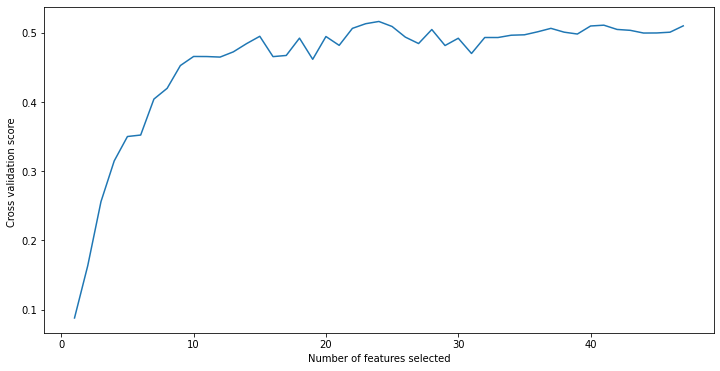

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score ')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [38]:
rfecv.estimator_  

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [45]:
data_1_itration = {}
for i,ranking in enumerate(rfecv.ranking_):
    data_1_itration[X.columns.values[i]]=ranking
    

sorted_data_1_itration = {k: v for k, v in sorted(data_1_itration.items(), key=lambda item: item[1])}
for k in sorted_data_1_itration:
    print(k, data_1_itration[k])

clim_PTA_albers 1
be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata 1
3dem_mag1_fin 1
ceno_euc_aust1 1
be-l8-all-85m-avg-BLUE.filled.lzw.nodata 1
dem_fill 1
relief_elev_focalrange1000m_3s 1
LATITUDE_GRID1_clip 1
LOC_distance_to_coast 1
be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata 1
relief_roughness 1
LONGITUDE_GRID1_clip 1
si_geol1 1
3dem_mag2 1
Dose_2016 1
Clim_Prescott_LindaGregory 1
Potassium_2016 1
mrvbf_9 1
Rad2016K_Th 1
be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata 1
clim_RSM_albers 1
relief_elev_focalrange300m_3s 1
relief_mrvbf_3s_mosaic 1
saga_wetSM_85_reprojected 1
national_Wii_RF_multirandomforest_prediction 2
water-85m_3 3
Rad2016U_Th 4
tpi_300 5
clim_WDA_albers 6
s2-dpca-85m_1 7
be-30y-85m-avg-SWIR2.filled.lzw.nodata 8
water-85m_2 9
be-30y-85m-avg-SWIR1.filled.lzw.nodata 10
Thorium_2016 11
clim_EPA_albers 12
Grav_lane_clip 13
be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata 14
3dem_mag0.fin 15
water-85m_1 16
be-30y-85m-avg-RED.filled.lzw.nodata 17
s2-dpca-85m_2 18
be-30y-85m-avg

#### Start processing using:  ../data/formated_dataset.csv

In [21]:
%%time
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

input_file = input_files[0]
print("Start processing using: ",input_file)

df = pd.read_csv(input_file).astype('float32')
df = df[~df.isin([np.nan, np.inf, -np.inf,-9999.0]).any(1)]
y = df['target'].values
X = df.drop("target",axis=1).values

model = XGBRegressor(objective='reg:squarederror',tree_method='gpu_hist', gpu_id=0, n_jobs=-1)
rfecv = RFECV(estimator=model)

pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])

cv = KFold(n_splits=3,shuffle=True, random_state=3)    
cv_scores = cross_val_score(pipeline, X, y, scoring='r2', cv=cv, n_jobs=-1, verbose=2)
pipeline.fit(X,y)

# cv_scores = cross_val_score(rfe, X, y, cv=kf,scoring='r2', n_jobs=-1,verbose=2)

mean_score = np.mean(cv_scores)
print("cv_scores: ", cv_scores)
# summarize all features
X = df.drop("target",axis=1)
for i in range(X.shape[1]):
    print("Feature Name: ",X.columns.values[i])
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfecv.support_[i], rfecv.ranking_[i]))

print('Optimal number of features : %d' % rfecv.n_features_)
print("Grid Scores: ", rfecv.grid_scores_)


Start processing using:  ../data/formated_dataset.csv


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  8.9min finished


cv_scores:  [0.88532866 0.87943198 0.88154469]
Feature Name:  tpi_300
Column: 0, Selected False, Rank: 6.000
Feature Name:  Grav_lane_clip
Column: 1, Selected True, Rank: 1.000
Feature Name:  clim_PTA_albers
Column: 2, Selected True, Rank: 1.000
Feature Name:  be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata
Column: 3, Selected True, Rank: 1.000
Feature Name:  be-30y-85m-avg_BLUE+SWIR2
Column: 4, Selected False, Rank: 5.000
Feature Name:  3dem_mag1_fin
Column: 5, Selected True, Rank: 1.000
Feature Name:  ceno_euc_aust1
Column: 6, Selected True, Rank: 1.000
Feature Name:  be-l8-all-85m-avg-BLUE.filled.lzw.nodata
Column: 7, Selected True, Rank: 1.000
Feature Name:  be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata
Column: 8, Selected True, Rank: 1.000
Feature Name:  Thorium_2016
Column: 9, Selected True, Rank: 1.000
Feature Name:  dem_fill
Column: 10, Selected True, Rank: 1.000
Feature Name:  relief_elev_focalrange1000m_3s
Column: 11, Selected True, Rank: 1.000
Feature Name:  LATITUDE_GRID1_clip

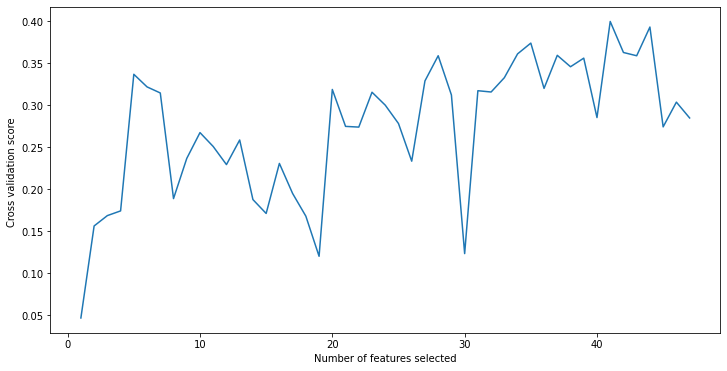

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score ')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [15]:
unsorteddic = {}
for i, rank in enumerate(rfecv.ranking_):
        unsorteddic[X.columns.values[i]] = rank
sorteddic = dict(sorted(unsorteddic.items(), key=lambda item: item[1]))
sorteddic

{'Grav_lane_clip': 1,
 'clim_PTA_albers': 1,
 'be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata': 1,
 '3dem_mag1_fin': 1,
 'ceno_euc_aust1': 1,
 'be-l8-all-85m-avg-BLUE.filled.lzw.nodata': 1,
 'be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata': 1,
 'Thorium_2016': 1,
 'dem_fill': 1,
 'relief_elev_focalrange1000m_3s': 1,
 'LATITUDE_GRID1_clip': 1,
 'LOC_distance_to_coast': 1,
 'be-30y-85m-avg-SWIR1.filled.lzw.nodata': 1,
 'clim_EPA_albers': 1,
 'be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata': 1,
 'LONGITUDE_GRID1_clip': 1,
 'si_geol1': 1,
 'be-30y-85m-avg-SWIR2.filled.lzw.nodata': 1,
 'national_Wii_RF_multirandomforest_prediction': 1,
 '3dem_mag2': 1,
 'clim_WDA_albers': 1,
 'Dose_2016': 1,
 'be-30y-85m-avg-GREEN.filled.lzw.nodata': 1,
 'Clim_Prescott_LindaGregory': 1,
 'Potassium_2016': 1,
 'mrvbf_9': 1,
 'Rad2016K_Th': 1,
 'be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata': 1,
 'be-30y-85m-avg-RED.filled.lzw.nodata': 1,
 'clim_RSM_albers': 1,
 'relief_elev_focalrange300m_3s': 1,
 'relief_mrvb

## In-house Recursive feature elimination

In [23]:
# # from sklearn.metrics import  explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

# # Start cluster and client. This is currently local, although I would like to make this distributed across many nodes.
# # cluster = LocalCUDACluster(CUDA_VISIBLE_DEVICES='0,1,2,3', threads_per_worker=2)
# cluster = LocalCluster(n_workers=24,threads_per_worker=12,dashboard_address='0.0.0.0:8787')
# # cluster = LocalCluster(dashboard_address='0.0.0.0:8787') # Workers: 6, Cores: 24
# # cluster = LocalCUDACluster(CUDA_VISIBLE_DEVICES='0,1,2,3', threads_per_worker=24,dashboard_address='0.0.0.0:8787')

# # cluster = LocalCUDACluster()
# client = Client(cluster)
# client

In [25]:
import statistics 
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import statistics 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
from pathlib import Path
import pickle
from sklearn.model_selection import KFold


def get_score_without_feature(X, y, features_to_drop):    
    
    model = XGBRegressor(objective='reg:squarederror',tree_method='gpu_hist', gpu_id=0, n_jobs=-1)
    kf = KFold(n_splits=3,shuffle=True, random_state=3)
    cv_scores = cross_val_score(model, X.drop(features_to_drop,axis=1).values, y.values, cv=kf,scoring='r2', n_jobs=-1)
    mean_score = np.mean(cv_scores)
    return mean_score

In [26]:
def find_least_important_feature(X, y):
        
    intermediate_results = {}
    for featureindex,feature_name in enumerate(X.columns):
        score_without_feature = get_score_without_feature(X, y, feature_name)
        intermediate_results[feature_name] = score_without_feature
        print("Getting score for: ",feature_name,score_without_feature,type(score_without_feature),len(X.columns)-1)
           
    # calculate the results        
    lowest_feature = None
    lowest_score = -9999
    for feature_name in intermediate_results.keys():
        score_without_feature = intermediate_results[feature_name]
        if score_without_feature >= lowest_score:
            lowest_score = score_without_feature
            lowest_feature = feature_name
        del score_without_feature
    
    
    results = {}
    results["lowest_score"] = lowest_score
    results["lowest_feature"] = lowest_feature
    results["intermediate_results"] = intermediate_results
    return results

In [27]:
%%time

input_file = input_files[2]
df = pd.read_csv(input_file).astype('float32')
df = df[~df.isin([np.nan, np.inf, -np.inf,-9999.0]).any(1)]
y = df['target']
X = df.drop("target",axis=1)

min_features_required = 2
complete_result = {}
results = {}

current_total_feature = X.shape[1]
complete_result[current_total_feature] = {}

count = 1
print("Staring experiment for: ",X.shape[1]," features")
results[current_total_feature] = find_least_important_feature(X,y)
print("Results of ",str(count)," iteration:",results[current_total_feature]["lowest_score"],results[current_total_feature]["lowest_feature"])

current_X = X.drop(results[current_total_feature]["lowest_feature"],axis=1)   
current_total_feature = current_X.shape[1]

count = 2
while(current_total_feature>min_features_required):
    print("Staring experiment for: ",current_total_feature)
    results[current_total_feature] = find_least_important_feature(current_X,y)
    print("Results of ",str(count)," iteration:",results[current_total_feature]["lowest_score"],type(results[current_total_feature]["lowest_score"]),results[current_total_feature]["lowest_feature"])
    current_X = current_X.drop(results[current_total_feature]["lowest_feature"],axis=1)
    current_total_feature = current_X.shape[1]

    count = count + 1

output_file_name = str(input_file.stem)+".pkl"
print(output_file_name)
file = open(output_file_name, 'wb')
pickle.dump(results, file)
file.close()

Staring experiment for:  47  features
Getting score for:  tpi_300 0.7732238115250757 <class 'numpy.float64'> 46
Getting score for:  Grav_lane_clip 0.7708346022022307 <class 'numpy.float64'> 46
Getting score for:  clim_PTA_albers 0.7710640187704764 <class 'numpy.float64'> 46
Getting score for:  be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata 0.7724206177299702 <class 'numpy.float64'> 46
Getting score for:  be-30y-85m-avg_BLUE+SWIR2 0.771854892445044 <class 'numpy.float64'> 46
Getting score for:  3dem_mag1_fin 0.7692872287110896 <class 'numpy.float64'> 46
Getting score for:  ceno_euc_aust1 0.7690814287142086 <class 'numpy.float64'> 46
Getting score for:  be-l8-all-85m-avg-BLUE.filled.lzw.nodata 0.7723919213951363 <class 'numpy.float64'> 46
Getting score for:  be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata 0.7720888826800065 <class 'numpy.float64'> 46
Getting score for:  Thorium_2016 0.7718926004941619 <class 'numpy.float64'> 46
Getting score for:  dem_fill 0.7681254270552911 <class 'numpy.fl

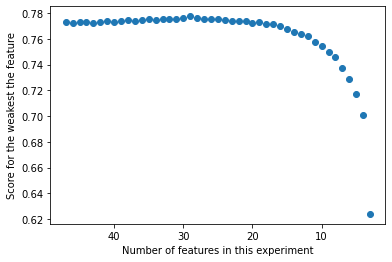

In [29]:
plot_1_data = []
for exp_no in results.keys():
        plot_1_data.append((exp_no,results[exp_no]["lowest_score"]))

plt.scatter(*zip(*plot_1_data))
plt.gca().invert_xaxis()
# plt.ylim(0,0.5)
plt.xlabel("Number of features in this experiment")
plt.ylabel("Score for the weakest the feature")
plt.show()

In [35]:
#results

## Compare both approaches

## Shutdown Cluster

In [220]:
# client = distributed.client._get_global_client()
# client

Client Scheduler: tcp://127.0.0.1:34217 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 96 Memory: 538.97 GB


In [221]:
# client.shutdown()


distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
ERROR:asyncio:_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
